# Lectura de data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finals/data categorizada.xlsx
/kaggle/input/vector/vectorizacion.xlsx


In [2]:
data = '/kaggle/input/finals/data categorizada.xlsx'
df = pd.read_excel(data)
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
0    209.85.218.52    3.1.0.0.0   1.3.1.0.0.0   
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   

                                             Subject  Has Attachment   Size  \
0                                                NaN               0   3.03   
1  DESCANSO VACACIONAL KETTY MORALES GAMBOA MAT. ...               0  22.25   
2         Factura sin pagar, regularizar. (91083214)               0  25.42   
3  Â¡Ãšltima advertencia: En caso de falta de pag...               0   7.31   
4                             MIDIS / 230912145756/                0   2.32   

   APT Verdict  
0     phishing  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  


In [3]:
#Eliminar filas con NaN
df = df.dropna()
filas = df.shape[0]
conteo = df.groupby('APT Verdict').size()
conteo

APT Verdict
no phishing    9889
phishing       9877
dtype: int64

# Limpieza de texto

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import re


def limpiar(texto):
    texto_sincaracter = re.sub(r'[^a-zA-Z\s]', '',str(texto))
    texto_min = texto_sincaracter.lower()
    soup = BeautifulSoup(texto_min, 'html.parser')
    texto_sinhtml = soup.get_text()
    texto_limpio = ' '.join(texto_sinhtml.split())
    return texto_limpio

df['Subject_limpio'] = df['Subject'].apply(limpiar)

print(df['Subject_limpio'])

1           descanso vacacional ketty morales gamboa mat s
2                            factura sin pagar regularizar
3        ltima advertencia en caso de falta de pago su ...
4                                                    midis
5              eps pacifico melanie zenith chambi diaz dni
                               ...                        
19995    banco de credito solicitud de sctr matricula s...
19996                                                     
19997                           tu factura esta por vencer
19998    importante consulta cambio de arrendador sixti...
19999                        ya podes acceder a tu factura
Name: Subject_limpio, Length: 19766, dtype: object


In [5]:
df = df.drop('Subject', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Subject_limpio', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Subject_limpio  Has Attachment   Size  \
1     descanso vacacional ketty morales gamboa mat s               0  22.25   
2                      factura sin pagar regularizar               0  25.42   
3  ltima advertencia en caso de falta de pago su ...               0   7.31   
4                                              midis               0   2.32   
5        eps pacifico melanie zenith chambi diaz dni               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Tokenización

In [6]:
from nltk.tokenize import word_tokenize
import spacy

# Aplica la tokenización a la columna 'Subject_limpio'
df['Tokens'] = df['Subject_limpio'].apply(word_tokenize)
print(df.head())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Subject_limpio  Has Attachment   Size  \
1     descanso vacacional ketty morales gamboa mat s               0  22.25   
2                      factura sin pagar regularizar               0  25.42   
3  ltima advertencia en caso de falta de pago su ...               0   7.31   
4                                              midis               0   2.32   
5        eps pacifico melanie zenith chambi diaz dni               0   6.16   

   APT Verdict                                             Tokens  
1  no phishing  [descanso, vacacional, ketty, morales, gamboa,...  
2     phishing                 [factura, sin, pagar, regularizar]  
3     phishing  [ltima, ad

In [7]:
df = df.drop('Subject_limpio', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                              Tokens  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                 [factura, sin, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, en, caso, de, falta, de, ...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Eliminar stop words

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def eliminar_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['Tokens_limpios'] = df['Tokens'].apply(eliminar_stopwords)
print(df.head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                              Tokens  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                 [factura, sin, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, en, caso, de, falta, de, ...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict                                     Tokens_limpios  
1  no phishing  [descanso, vacacional,

In [9]:
df = df.drop('Tokens', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens_limpios', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Tokens_limpios  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


# Lematización

In [10]:
!pip install spacy
!python -m spacy download es_core_news_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 71.1 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [11]:
import spacy

# Carga el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

def lematizar(tokens):
    lematizar = []
    for token in tokens:
        doc = nlp(token)
        lematizar.append(doc[0].lemma_)
    return lematizar

df['Tokens_lematizados'] = df['Tokens_limpios'].apply(lematizar)
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                      Tokens_limpios  Has Attachment   Size  \
1  [descanso, vacacional, ketty, morales, gamboa,...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltima, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambi, diaz,...               0   6.16   

   APT Verdict                                 Tokens_lematizados  
1  no phishing  [descanso, vacacional, ketty, moral, gamboa, m...  
2     phishing                      [factura, pagar, regularizar]  
3     phishing  [ltimo, ad

In [12]:
df = df.drop('Tokens_limpios', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'Tokens_lematizados', 'Has Attachment', 'Size', 'APT Verdict']
df = df[ordenar]
print(df.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [13]:
#Eliminar las filas de Tokens_lematizados que tienen vectores vacios (=[])
df = df[df['Tokens_lematizados'].apply(lambda x: len(x) > 0)]
df.shape[0]

19706

# TF-IDF

In [14]:
df_tfidf = df.copy()
print(df_tfidf.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Unir los tokens en una sola cadena de texto
df_tfidf['Subject'] = df_tfidf['Tokens_lematizados'].apply(lambda x: ' '.join(x))

# Crear un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 50)

# Aplicar TF-IDF a la columna 'Subject'
tfidf_matrix  = tfidf_vectorizer.fit_transform(df_tfidf['Subject'])

# Convertir la matriz dispersa en una matriz densa
tfidf_dense = tfidf_matrix.toarray()

# Agregar una nueva columna 'tfidf_bow' al DataFrame
df_tfidf['tfidf'] = tfidf_dense.tolist()
print(df_tfidf.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict                                            Subject  \
1  no phishing       descanso vacacional ketty moral gamboa mat s   
2     phishing                          factura pagar regularizar   
3     phishing  ltimo a

In [16]:
df_tfidf = df_tfidf.drop('Tokens_lematizados', axis=1)
df_tfidf = df_tfidf.drop('Subject', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'tfidf', 'Has Attachment', 'Size', 'APT Verdict']
df_tfidf = df_tfidf[ordenar]
print(df_tfidf.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                               tfidf  Has Attachment   Size  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  22.25   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  25.42   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6029696091685...               0   7.31   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   2.32   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [17]:
# Función para agregar números de IP a vectores
def agregar_ip_a_vector(ip1, ip2, ip3, vector):
    numeros_ip1 = [float(numero) for numero in ip1.split('.')]
    numeros_ip2 = [float(numero) for numero in ip2.split('.')]
    numeros_ip3 = [float(numero) for numero in ip3.split('.')]
    
    nuevo_vector = vector + numeros_ip1 + numeros_ip2 + numeros_ip3
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame
df_tfidf['Concatenado_ips'] = df_tfidf.apply(lambda row: agregar_ip_a_vector(row['Sender IP'], row['From (SMTP)'], row['From (Header)'], row['tfidf']), axis=1)

# Función para agregar enteros y floats como elementos individuales en los vectores
def agregar_numero_a_vector(vector, numero):
    nuevo_vector = vector + [float(numero)]
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame para enteros
df_tfidf['Concatenado_total'] = df_tfidf.apply(lambda row: agregar_numero_a_vector(row['Concatenado_ips'], row['Has Attachment']), axis=1)

# Aplicar la función a cada fila del DataFrame para floats
df_tfidf['Concatenado_total'] = df_tfidf.apply(lambda row: agregar_numero_a_vector(row['Concatenado_total'], row['Size']), axis=1)

# Mostrar el DataFrame resultante
print(df_tfidf.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                               tfidf  Has Attachment   Size  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  22.25   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  25.42   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6029696091685...               0   7.31   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   2.32   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1  no phishing  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     phishing  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     phishing  [0.0, 0

In [18]:
first_row = df_tfidf["Concatenado_total"].loc[1]
print(first_row)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.699714659887002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.71442242037832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 209.0, 85.0, 208.0, 47.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 22.25]


In [19]:
# Reemplazar "no phishing" por 0 y "phishing" por 1
df_tfidf['APT Verdict'] = df_tfidf['APT Verdict'].replace({'no phishing': 0, 'phishing': 1})
print(df_tfidf.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                               tfidf  Has Attachment   Size  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  22.25   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0  25.42   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6029696091685...               0   7.31   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   2.32   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1            0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2            1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3            1  [0.0, 0

### RANDOM FOREST

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_tfidf['Concatenado_total'].tolist()
y = df_tfidf['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9959411466260781
Precision: 0.9959416677176262
Recall: 0.9959411466260781
F-Score: 0.995941150805266
Specificity: 0.9954453441295547


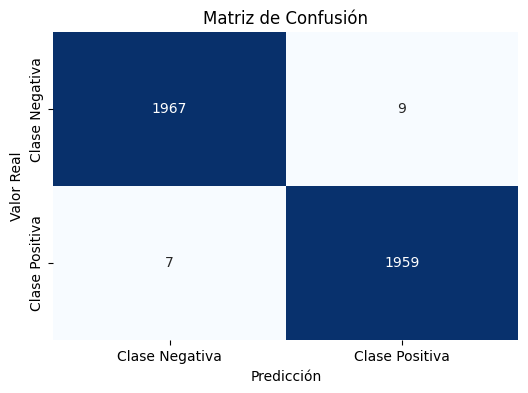

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### DECISION TREE

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_tfidf['Concatenado_total'].tolist()
y = df_tfidf['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de división
    'max_depth': [None, 2, 5, 10],  # Profundidad máxima del árbol
    'min_samples_split': [4, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2, 4, 8]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9921359715880264
Precision: 0.9921370813720161
Recall: 0.9921359715880264
F-Score: 0.9921359518510253
Specificity: 0.992914979757085


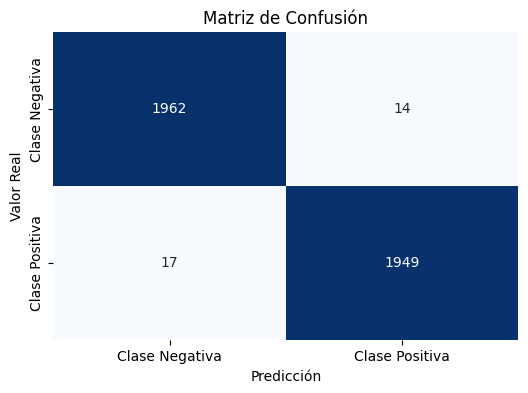

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### LOGISTIC REGRESSION

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_tfidf['Concatenado_total'].tolist()
y = df_tfidf['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
    'max_iter': [100, 500, 1000]  # Número máximo de iteraciones
}

# Crear un modelo de Regresión Logística
logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear', random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9353120243531202
Precision: 0.9361547539026255
Recall: 0.9353120243531202
F-Score: 0.9352768728136287
Specificity: 0.9574898785425101


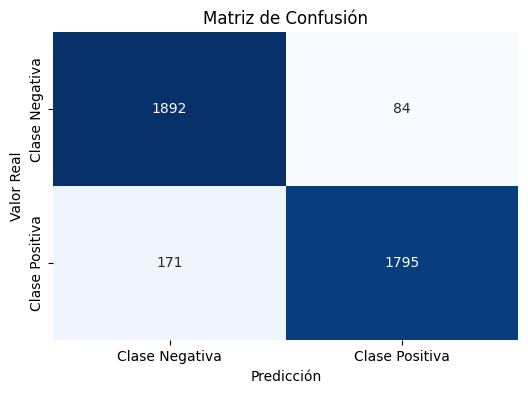

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

# Count Vectorization

In [26]:
df_countvect = df.copy()
print(df_countvect.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Convertir la columna de tokens en texto (frases)
df_countvect['Subject'] = df_countvect['Tokens_lematizados'].apply(lambda tokens: ' '.join(tokens))

# Crear un objeto CountVectorizer con un límite de 300 características
count_vectorizer = CountVectorizer(max_features=50)

# Aplicar Count Vectorization a la columna de texto y obtener la matriz de recuento
count_matrix = count_vectorizer.fit_transform(df_countvect['Subject'])

# Obtener la representación de texto vectorizado como una lista de listas
vectorized_text = count_matrix.toarray()

# Agregar la lista de vectores al DataFrame
df_countvect['countvect'] = vectorized_text.tolist()

# Imprimir el DataFrame resultante
print(df_countvect.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                  Tokens_lematizados  Has Attachment   Size  \
1  [descanso, vacacional, ketty, moral, gamboa, m...               0  22.25   
2                      [factura, pagar, regularizar]               0  25.42   
3  [ltimo, advertencia, caso, falta, pago, paquet...               0   7.31   
4                                            [midis]               0   2.32   
5  [eps, pacifico, melanie, zenith, chambiir, dia...               0   6.16   

   APT Verdict                                            Subject  \
1  no phishing       descanso vacacional ketty moral gamboa mat s   
2     phishing                          factura pagar regularizar   
3     phishing  ltimo a

In [28]:
df_countvect = df_countvect.drop('Tokens_lematizados', axis=1)
df_countvect = df_countvect.drop('Subject', axis=1)
ordenar = ['Sender IP', 'From (SMTP)', 'From (Header)', 'countvect', 'Has Attachment', 'Size', 'APT Verdict']
df_countvect = df_countvect[ordenar]
print(df_countvect.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                           countvect  Has Attachment   Size  \
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...               0  22.25   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0  25.42   
3  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   7.31   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   2.32   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...               0   6.16   

   APT Verdict  
1  no phishing  
2     phishing  
3     phishing  
4  no phishing  
5  no phishing  


In [29]:
# Función para agregar números de IP a vectores
def agregar_ip_a_vector(ip1, ip2, ip3, vector):
    numeros_ip1 = [float(numero) for numero in ip1.split('.')]
    numeros_ip2 = [float(numero) for numero in ip2.split('.')]
    numeros_ip3 = [float(numero) for numero in ip3.split('.')]
    
    nuevo_vector = vector + numeros_ip1 + numeros_ip2 + numeros_ip3
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame
df_countvect['Concatenado_ips'] = df_countvect.apply(lambda row: agregar_ip_a_vector(row['Sender IP'], row['From (SMTP)'], row['From (Header)'], row['countvect']), axis=1)

# Función para agregar enteros y floats como elementos individuales en los vectores
def agregar_numero_a_vector(vector, numero):
    nuevo_vector = vector + [float(numero)]
    return nuevo_vector

# Aplicar la función a cada fila del DataFrame para enteros
df_countvect['Concatenado_total'] = df_countvect.apply(lambda row: agregar_numero_a_vector(row['Concatenado_ips'], row['Has Attachment']), axis=1)

# Aplicar la función a cada fila del DataFrame para floats
df_countvect['Concatenado_total'] = df_countvect.apply(lambda row: agregar_numero_a_vector(row['Concatenado_total'], row['Size']), axis=1)

# Mostrar el DataFrame resultante
print(df_countvect.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                           countvect  Has Attachment   Size  \
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...               0  22.25   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0  25.42   
3  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   7.31   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   2.32   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1  no phishing  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   
2     phishing  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     phishing  [0, 0, 

In [30]:
first_row = df_countvect["Concatenado_total"].loc[1]
print(first_row)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 209.0, 85.0, 208.0, 47.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 22.25]


In [31]:
# Reemplazar "no phishing" por 0 y "phishing" por 1
df_countvect['APT Verdict'] = df_countvect['APT Verdict'].replace({'no phishing': 0, 'phishing': 1})
print(df_countvect.head())

         Sender IP  From (SMTP) From (Header)  \
1    209.85.208.47    1.1.1.0.0   1.1.1.1.0.0   
2     62.72.20.134    7.6.2.0.0   1.7.5.4.0.0   
3  136.143.188.200  22.21.2.0.0  1.26.1.0.0.0   
4    13.110.78.189    1.1.1.0.0   1.1.1.1.0.0   
5   148.163.152.55    1.1.1.0.0   1.1.1.1.0.0   

                                           countvect  Has Attachment   Size  \
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...               0  22.25   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0  25.42   
3  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   7.31   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0   2.32   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...               0   6.16   

   APT Verdict                                    Concatenado_ips  \
1            0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   
2            1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3            1  [0, 0, 

### RANDOM FOREST

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_countvect['Concatenado_total'].tolist()
y = df_countvect['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9954337899543378
Precision: 0.9954342883267241
Recall: 0.9954337899543378
F-Score: 0.9954337829019221
Specificity: 0.9959514170040485


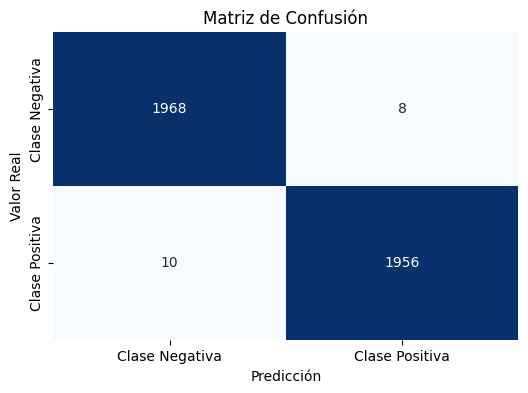

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### DECISION TREE

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_countvect['Concatenado_total'].tolist()
y = df_countvect['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de división
    'max_depth': [None, 2, 5, 10],  # Profundidad máxima del árbol
    'min_samples_split': [4, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [2, 4, 8]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9939117199391172
Precision: 0.9939117199391172
Recall: 0.9939117199391172
F-Score: 0.9939117199391172
Specificity: 0.9939271255060729


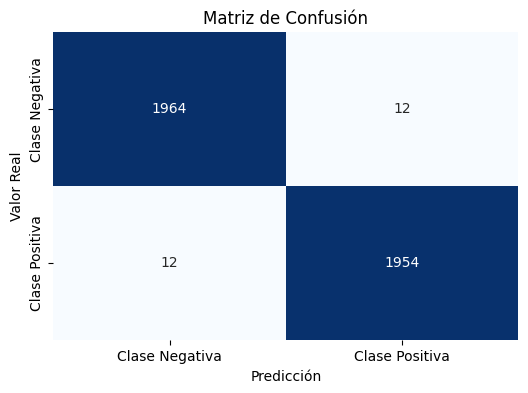

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

### LOGISTIC REGRESSION

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Separar las características (vectores) y las etiquetas
X = df_countvect['Concatenado_total'].tolist()
y = df_countvect['APT Verdict']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Definir los hiperparámetros a sintonizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
    'max_iter': [100, 500, 1000]  # Número máximo de iteraciones
}

# Crear un modelo de Regresión Logística
logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear', random_state=2023)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros sintonizados
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# Calcular el F-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-Score: {f1}')

# Calcular la especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity}')

Accuracy: 0.9355657026889903
Precision: 0.9364685027078744
Recall: 0.9355657026889903
F-Score: 0.9355283599700098
Specificity: 0.958502024291498


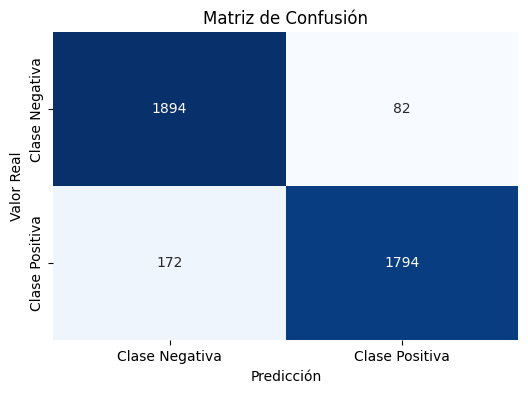

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'],
            yticklabels=['Clase Negativa', 'Clase Positiva'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

# FIN DEL CÓDIGO